# Weather Type Classification Dataset

Data set id from Kaggle's data repo. This is syntetic data to practice classification. 

##Variables:

    - Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
    - Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
    - Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
    - Precipitation (%) (numeric): The precipitation percentage, including outlier values.
    - Cloud Cover (categorical): The cloud cover description.
    - Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
    - UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
    - Season (categorical): The season during which the data was recorded.
    - Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
    - Location (categorical): The type of location where the data was recorded.
    - Weather Type (categorical): The *target variable for classification*, indicating the weather type.

    Weather type can be **Rainy**, **Sunny**, **Cloudy**, and **Snowy**.



# Read dataset

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:

df=pd.read_csv("./weather_classification_data.csv")

In [4]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
df.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [6]:
df.shape

(13200, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [9]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

There is no missing data in these dataset, so I won't need any imputing methods.

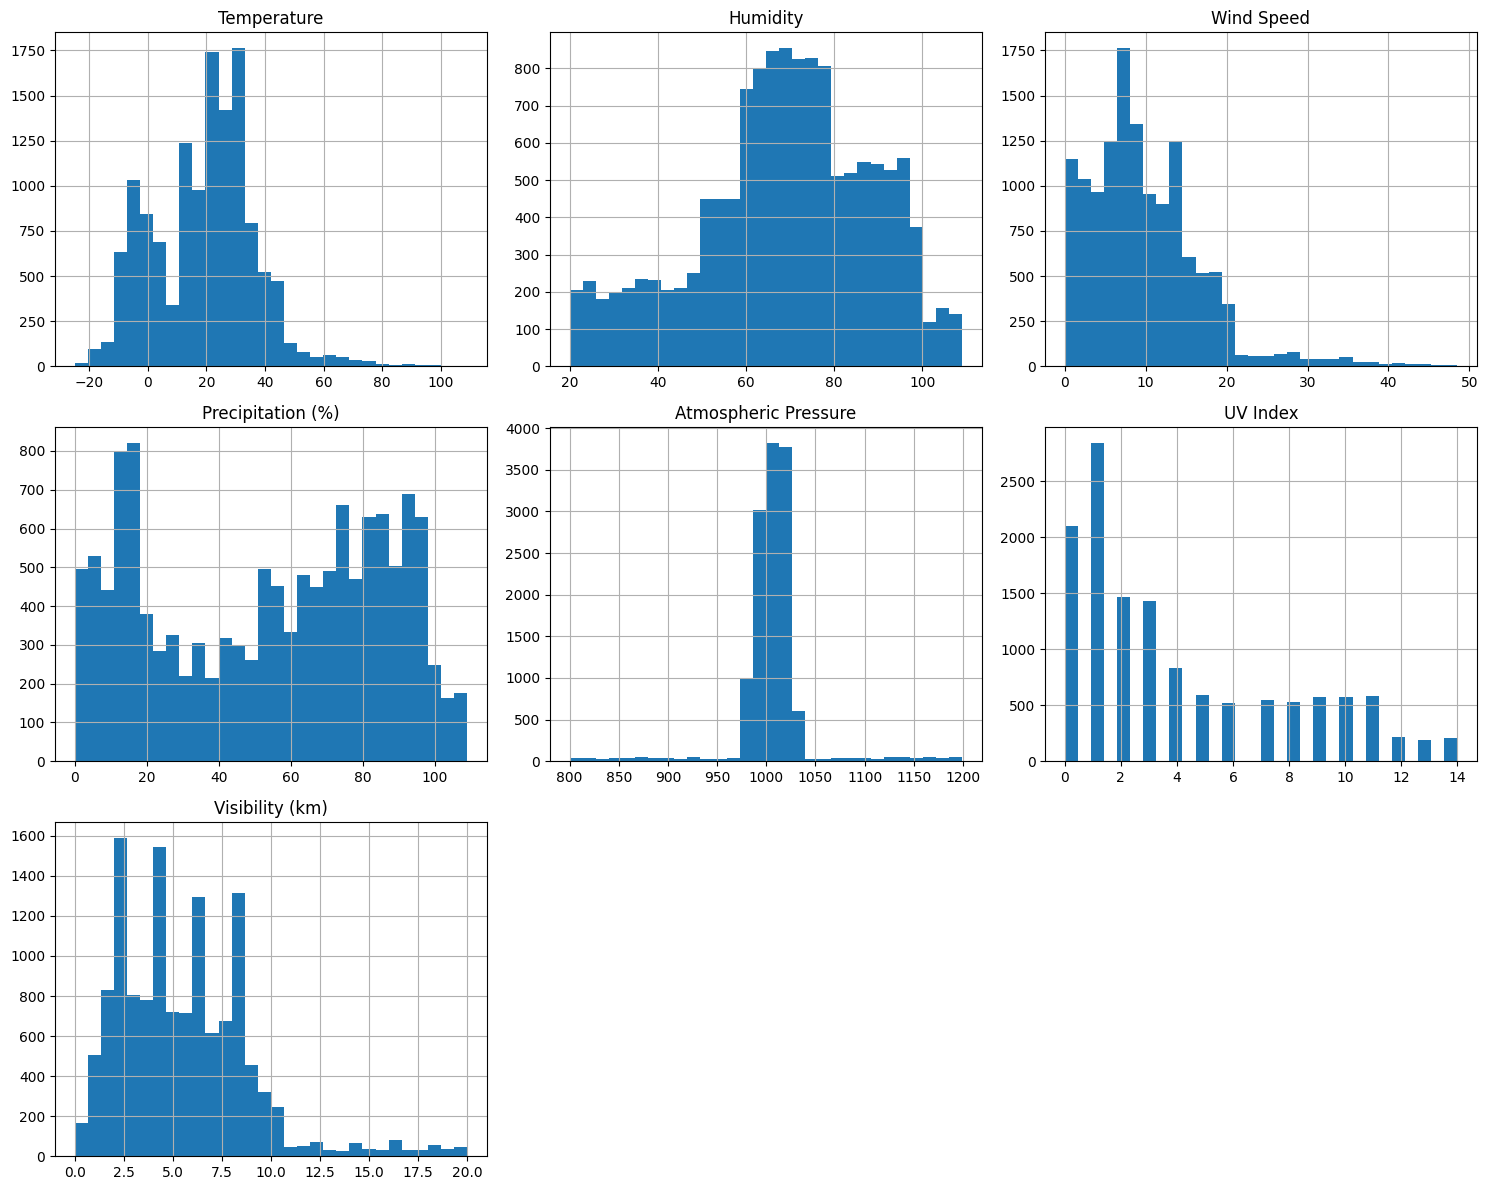

In [10]:
# Analysis of the distribution
df.hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show()

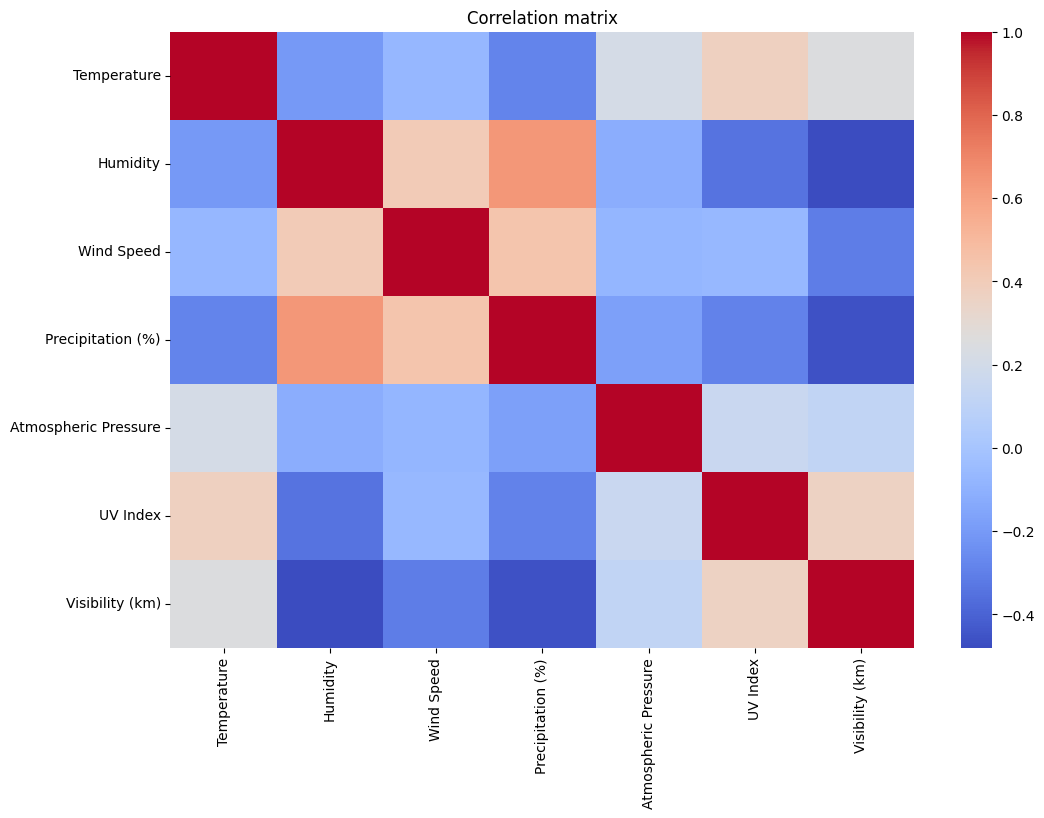

In [11]:
# Correlations
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

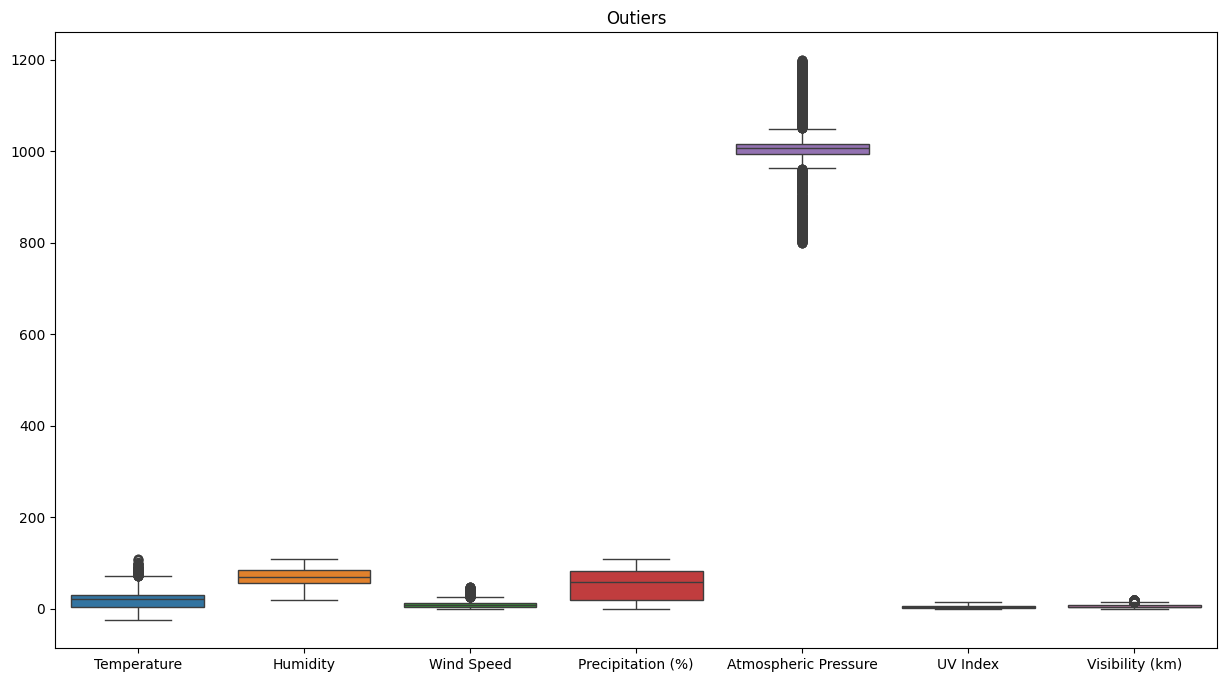

In [12]:
# Outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title("Outiers")
plt.show()

Label encoding for weater type, cloud cover, season and location

In [13]:
encoded_df = df.copy()

encode = LabelEncoder()
cat_col = [var for var in df.columns if df[var].dtypes =="object"]
for var in cat_col:
    encoded_df[var] = encode.fit_transform(encoded_df[var])

encoded_df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1.990227,1005.827896,4.005758,1.849394,5.462917,1.094091,1.500000
std,17.386327,20.194248,6.908704,31.946541,1.012302,37.199589,3.856600,1.164824,3.371499,0.791420,1.118076
min,-25.000000,20.000000,0.000000,0.000000,0.000000,800.120000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,2.000000,994.800000,1.000000,1.000000,3.000000,0.000000,0.750000
50%,21.000000,70.000000,9.000000,58.000000,2.000000,1007.650000,3.000000,2.000000,5.000000,1.000000,1.500000
75%,31.000000,84.000000,13.500000,82.000000,3.000000,1016.772500,7.000000,3.000000,7.500000,2.000000,2.250000
max,109.000000,109.000000,48.500000,109.000000,3.000000,1199.210000,14.000000,3.000000,20.000000,2.000000,3.000000


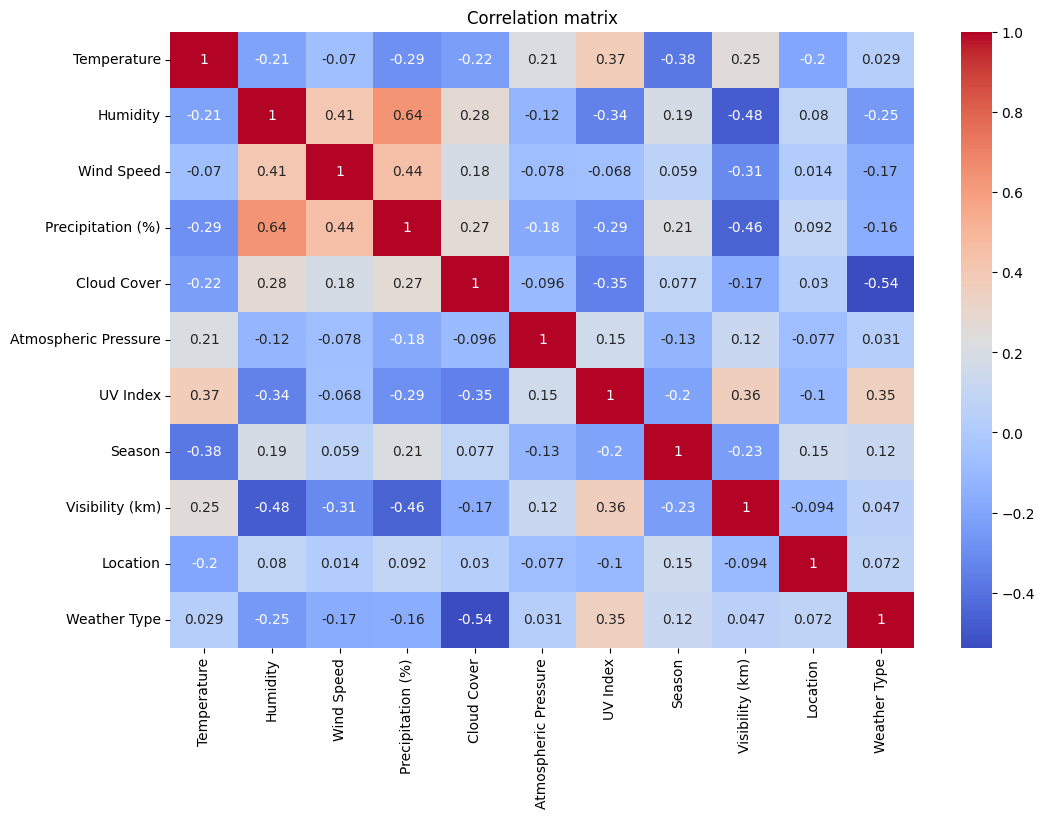

In [14]:
# Correlations
corr = encoded_df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

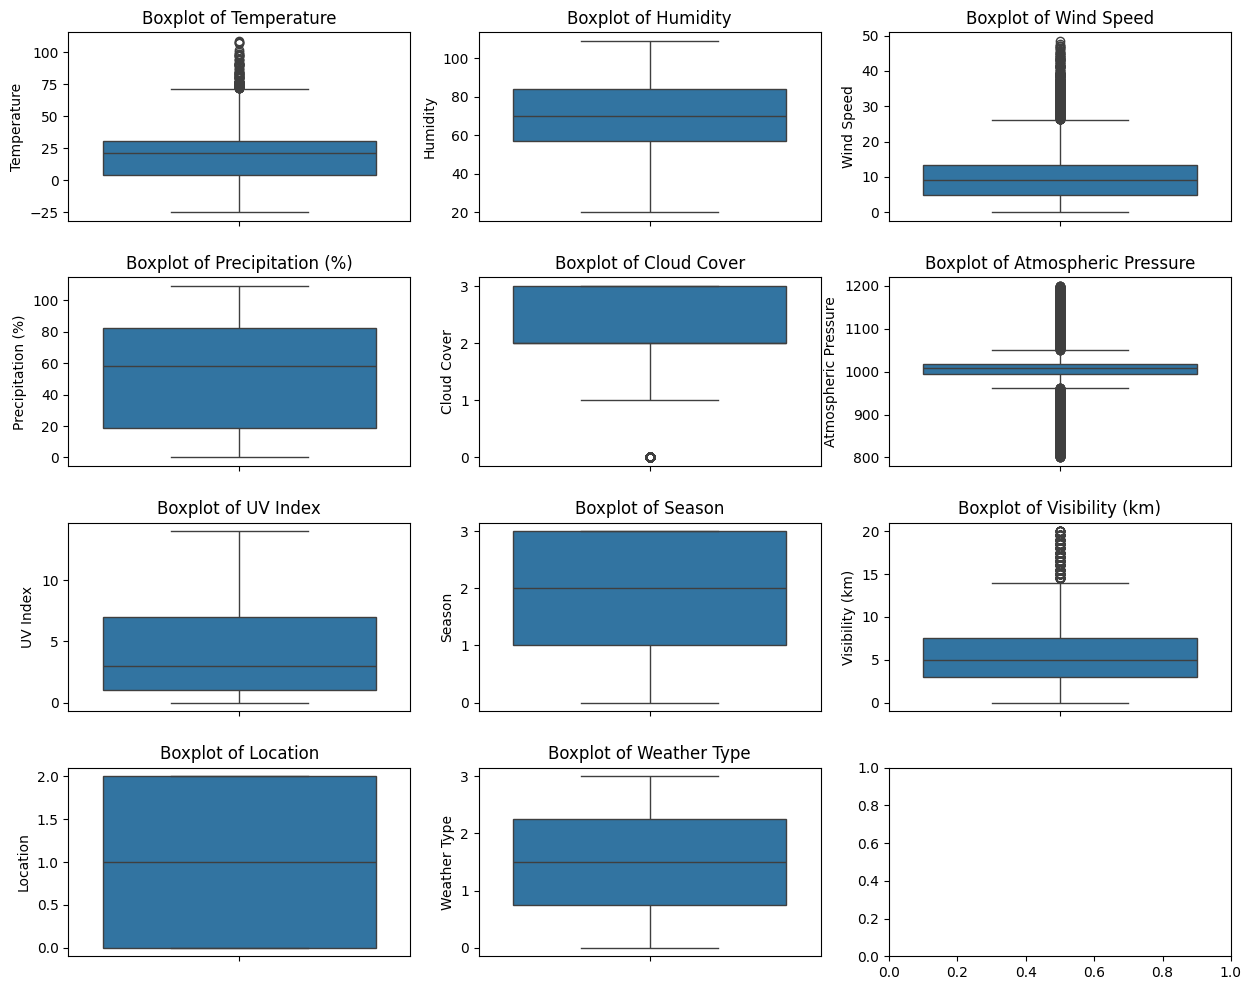

In [15]:
# Outliers
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
for i, col in enumerate( encoded_df.columns):
    ax = axes[i // 3, i % 3] 
    sns.boxplot(data=encoded_df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
plt.subplots_adjust(hspace=0.3)
plt.show()